## Purpose

I'm going to use this as a research notebook. It's main purpose for now will be collecting a list of the factors that impact player or goalie value.

Player value is defined by DraftKings as below:
<ul>
<li>Goal = +3 PTS</li>
<li>Assist = +2 PTS</li>
<li>Shot on Goal = +0.5 PTS</li>
<li>Blocked Shot = +0.5 PTS</li>
<li>Short Handed Point Bonus (Goal/Assist) = +1 PTS</li>
<li>Shootout Goal = +0.2 PTS</li>
<li>Hat Trick Bonus = +1.5 PTS</li>
</ul>

Player value by FanDuel:
<ul>
<li>Goals = 12pts</li>
<li>Assists = 8pts</li>
<li>Shots on Goal = 1.6pts</li>
<li>Short Handed Points = +2pts</li>
<li>Power Play Points = +0.5pts</li>
<li>Blocked Shots = 1.6pts</li>
</ul>

Goalie value by DraftKings:
<ul>
<li>Win = +3 PTS</li>
<li>Save = +0.2 PTS</li>
<li>Goal Against = -1 PTS</li>
<li>Shutout Bonus = +2 PTS</li>
</ul>

Goalie value by FanDuel:
<ul>
<li>Wins = 12pts</li>
<li>Goals Against = -4pts</li>
<li>Saves = 0.8pts</li>
<li>Shutouts = 8pts</li>
</ul>

The two scoring systems are very similar, and the analysis should not have to change much between the two.

The most important part of the fantasy system is to accurately determine the distribution and expectation of point value for any  player for any particular matchup. Some analysis (and creativity) is required in order to determine what factors strongly affect a player's likelihood of scoring goals, assists, wins, etc.

## Goals Featureset

What characteristics could affect a players likelihood to score goals? Some of these may seem redundant but I'm trying to be thorough.

<table style="width: 100%">
  <tr>
    <th>Stat</th>
    <th>Correlation info</th>
    <th>Location</th>
  </tr>
<tr>
<td>Goals Per Game history</td><td></td><td></td></tr>
<tr><td>Goals Per Game against this particular team</td><td></td><td></td></tr>
<tr><td>Goals Per Game against this particular goalie</td><td></td><td></td></tr>
<tr><td>Assists Per Game history</td><td></td><td></td></tr>
<tr><td>Assists Per Game against this particular team</td><td></td><td></td></tr>
<tr><td>Assists Per Game against this particular goalie</td><td></td><td></td></tr>
<tr><td>Assists per game of line-mates</td><td></td><td></td></tr>
<tr><td>Goals per game of line-mates</td><td></td><td></td></tr>
<tr><td>Save percentage of opposing goalie</td><td></td><td></td></tr>
<tr><td>Recent ice time for player</td><td></td><td></td></tr>
<tr><td>Number of games played recently</td><td></td><td></td></tr>
<tr><td>Rookie or veteran player</td><td></td><td></td></tr>
<tr><td>Shifts per game</td><td></td><td></td></tr>
<tr><td>Plus minus</td><td></td><td></td></tr>
<tr><td>Penalty minutes</td><td></td><td></td></tr>
<tr><td>Power play goals</td><td></td><td></td></tr>
<tr><td>Power play assists</td><td></td><td></td></tr>
<tr><td>Short handed goals</td><td></td><td></td></tr>
<tr><td>Short handed assists</td><td></td><td></td></tr>
<tr><td>Game winning goals</td><td></td><td></td></tr>
<tr><td>Overtime goals</td><td></td><td></td></tr>
<tr><td>Shots</td><td></td><td></td></tr>
<tr><td>Shot percentage</td><td></td><td></td></tr>
<tr><td>Time on ice per game</td><td></td><td></td></tr>
</table>




['Rk', 'Player', 'Age', 'Pos', 'Tm', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%']
['Age', 'GP', 'A', '+/-', 'PIM', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL']


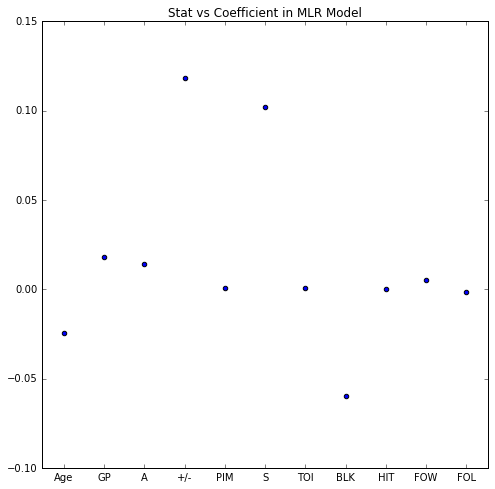

After a simple training of an MLR model, the featurescoefficient values are:
Age : -0.0244170511778
GP : 0.0182574745415
A : 0.0141495634987
+/- : 0.118176228244
PIM : 0.000597504354923
S : 0.101980645822
TOI : 0.000620994967898
BLK : -0.059509784812
HIT : 0.000147904593041
FOW : 0.00534717334278
FOL : -0.00153689835751


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv('./data/testdata.csv')

column_names = list(data.columns.values)
feature_cols = column_names.copy()
print(feature_cols)
feature_cols.remove('Rk')
feature_cols.remove('Player')
feature_cols.remove('Pos')
feature_cols.remove('Tm')
feature_cols.remove('ATOI')
feature_cols.remove('PTS')
feature_cols.remove('G')
feature_cols.remove('EV')
feature_cols.remove('PP')
feature_cols.remove('SH')
feature_cols.remove('GW')
feature_cols.remove('S%')
feature_cols.remove('EV.1')
feature_cols.remove('PP.1')
feature_cols.remove('SH.1')
#TODO: get rid of this
feature_cols.remove('FO%')
print(feature_cols)

X = data[feature_cols]
y = data['G']

lm = LinearRegression()
lm.fit(X, y)
coefficients = zip(feature_cols, lm.coef_)

plt.figure(figsize=(8,8))
x = range(len(feature_cols))
plt.xticks(x, feature_cols)
plt.scatter(x, lm.coef_)
plt.title('Stat vs Coefficient in MLR Model')
plt.show()

print('After a simple training of an MLR model, the featurescoefficient values are:')
for i, coef in enumerate(lm.coef_):
    print(feature_cols[i] + ' : ' + str(coef))